# End-to-end Machine Learning project

In this notebook, we will go through an example project end to end.
 
Here are the main steps you will go through:
<ol>
<li>Look at the big picture.</li>
    <ul>
    <li>Frame the Problem</li>
    <li>Select a Performance Measure</li>
    </ul>  
        
<li>Get the data.</li>
    <ul>
    <li>Take a Quick Look at the Data</li>
    <li>Create a Test Set</li>
    </ul>  
<li>Discover and visualize the data</li>
    <ul>
    <li>Visualizing Geographical Data</li>
    <li>Looking for Correlations</li>
    <li>Experimenting with Attribute Combinations</li>
    </ul>  
<li>Prepare the data for ML algorithms.</li>
    <ul>
    <li>Data Cleaning</li>
    <li>Handling Text and Categorical Attributes</li>
    <li>Transformation Pipelines</li>
    </ul>  
<li>Select a model and train it</li>
<li>Fine-tune your model.</li>
<li>Present your solution.</li>
<li>Launch, monitor, and maintain your system.</li>
</ol>

<a id='intro'></a>
## Introduction

First, let's import a few common modules

In [1]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import seaborn as sns
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Get the Data

In [2]:
housing = pd.read_csv('housing.csv')

### Take a Quick Look at the Data Structure

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.sample(5) #get random sample

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17579,-121.93,37.30,16.0,1111.0,226.0,317.0,199.0,2.7153,233300.0,<1H OCEAN
1980,-120.88,38.58,8.0,3417.0,604.0,1703.0,623.0,4.0827,170700.0,INLAND
13328,-117.66,34.05,6.0,5129.0,1119.0,2533.0,949.0,3.6250,113600.0,INLAND
9036,-117.78,34.58,6.0,10263.0,1864.0,6163.0,1781.0,3.8803,120000.0,INLAND
1371,-122.11,38.01,39.0,1313.0,306.0,575.0,231.0,3.1711,116100.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


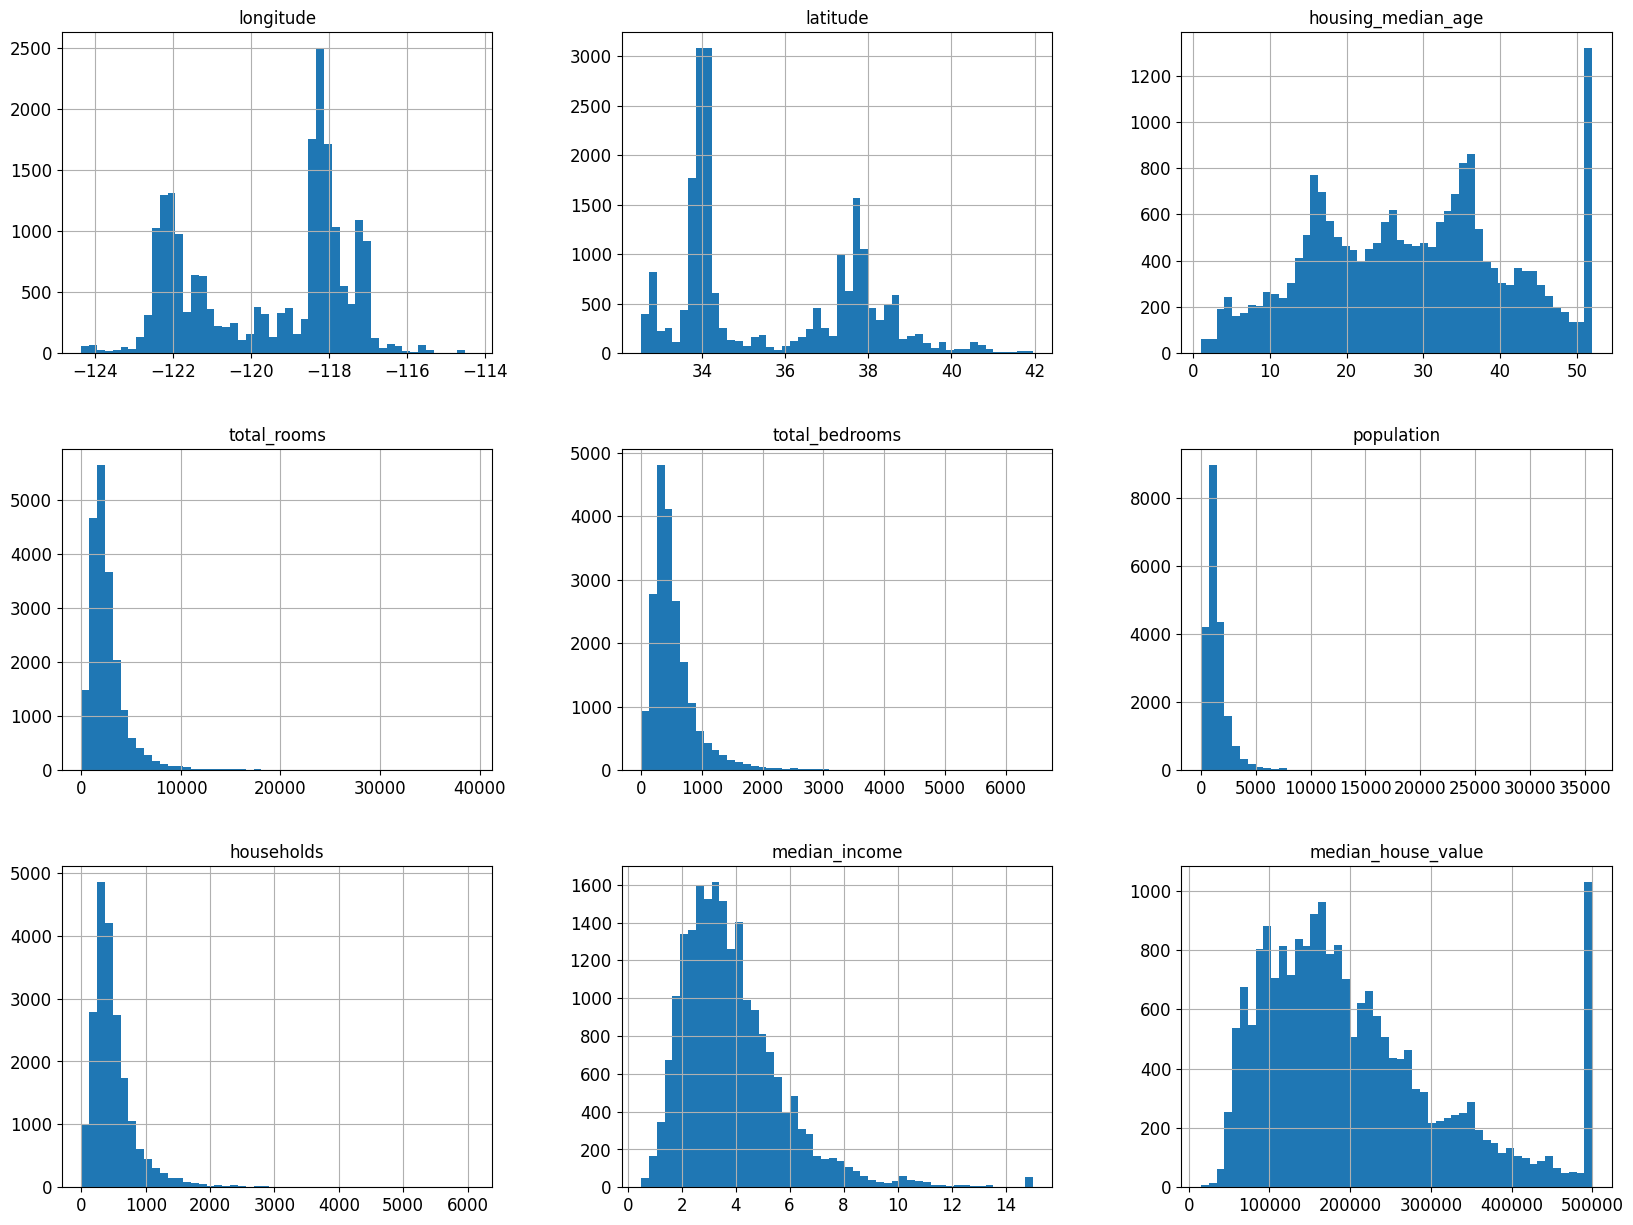

In [8]:
housing.hist(bins=50, figsize=(20,15));

### Create a Test Set

In [9]:
from sklearn.model_selection import train_test_split

# `random_state` to make this notebook's output identical at every run

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [10]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


## Discover and Visualize the Data to Gain Insights

### Visualizing Geographical Data

In [11]:
housing = train_set.copy()

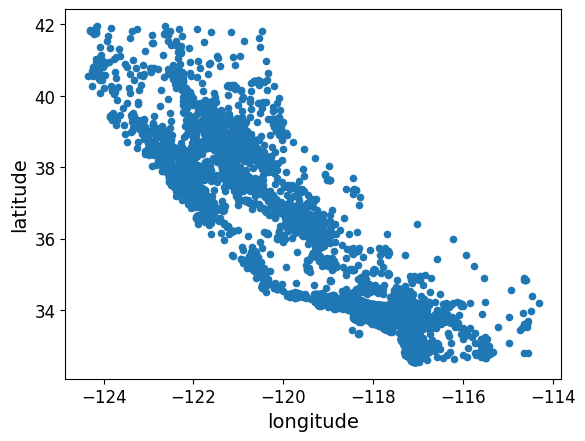

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude");

![](https://www.worldatlas.com/r/w1200/upload/c4/c6/81/ca-01.png)

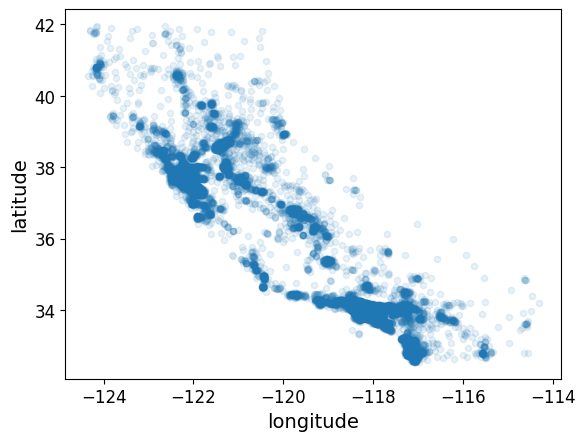

In [13]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1);

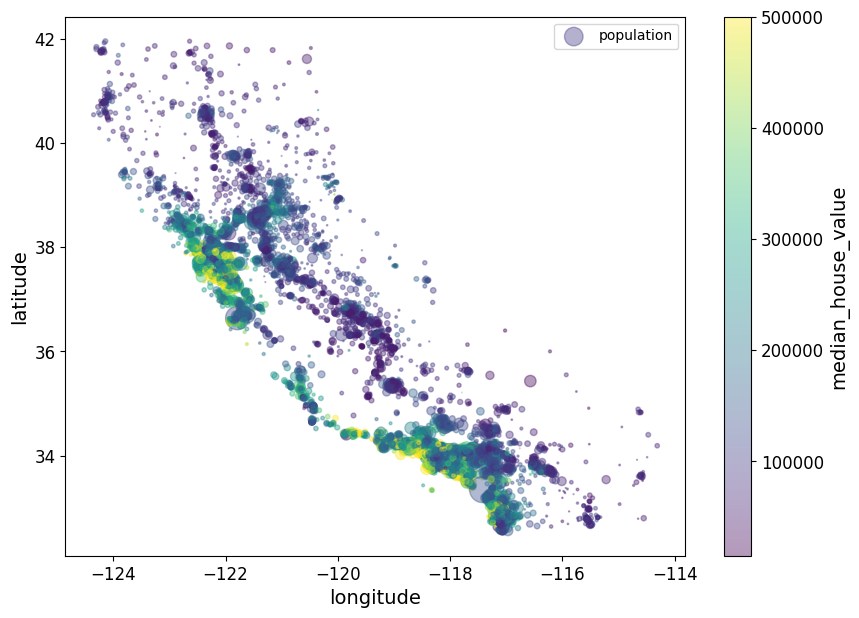

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", colorbar=True,
             sharex=False)
plt.legend();

## Looking for Correlations

In [15]:
corr_matrix = housing.corr(numeric_only=True)

In [16]:
#`median_house_value` is what we are tyring to predict 
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

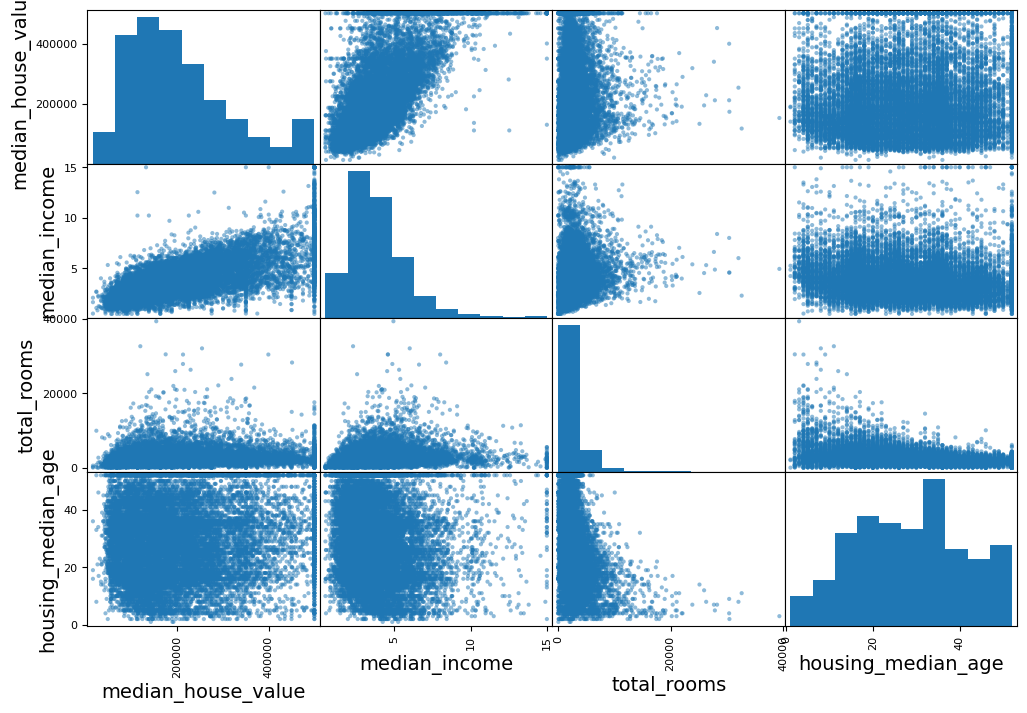

In [17]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8));

Same plot with seaborn

<Figure size 1200x800 with 0 Axes>

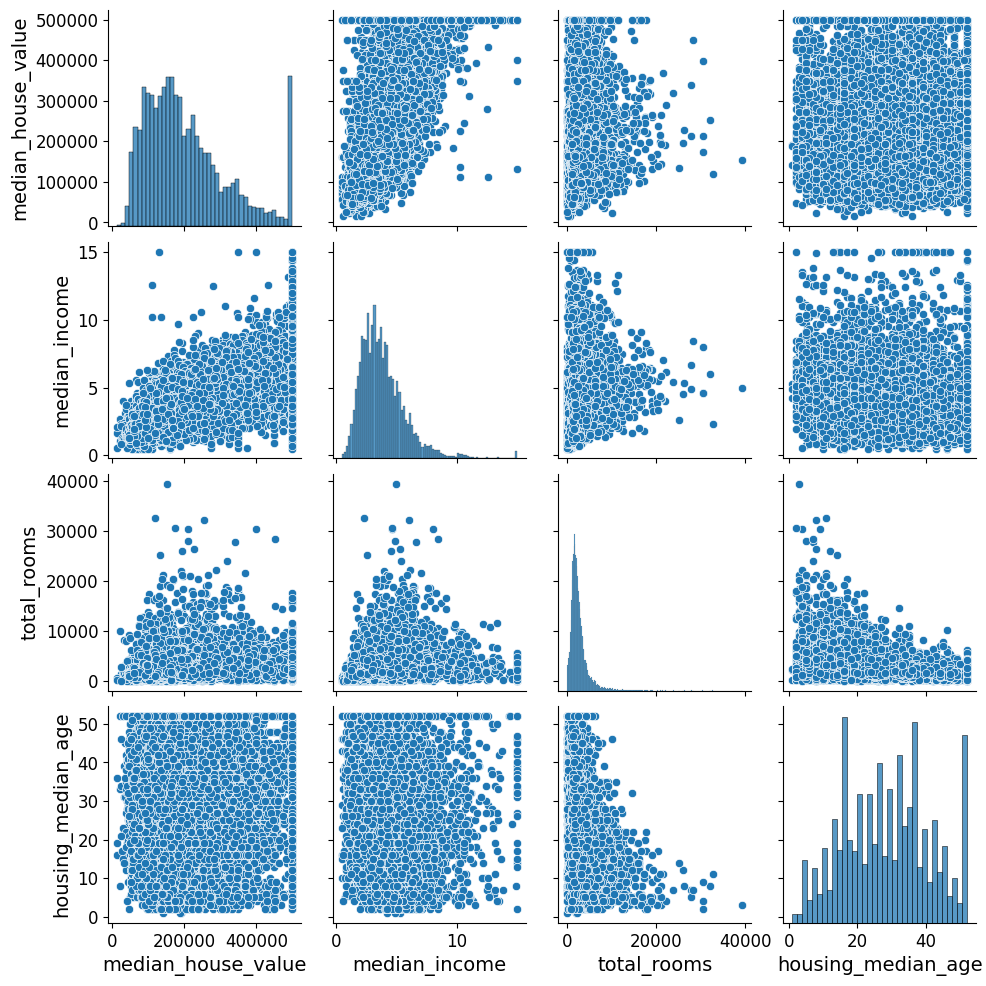

In [18]:
plt.figure(figsize=(12, 8))
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
sns.pairplot(housing[attributes]);

The heighest correlation with median_income. Let's zoom in 

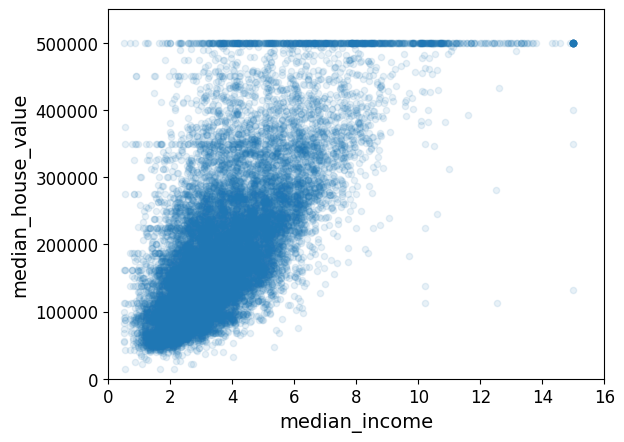

In [27]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000]);

In [28]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [29]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

C:\Users\dell\AppData\Local\Temp\ipykernel_24144\826279322.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

# Prepare the Data for Machine Learning Algorithms

In [19]:
housing.shape

(16512, 10)

In [20]:
# split dataset
train_size = int(housing.shape[0]*0.7)
train_size

11558

In [21]:
train_data = housing[:train_size]
test_data = housing[train_size:]
print(train_data.shape)
print(test_data.shape)

(11558, 10)
(4954, 10)


In [30]:
# Split data to X (Features) and y (label)
housing = train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = train_set["median_house_value"].copy()

## Data Cleaning

In the book 3 options are listed:

```python
housing.dropna(subset=["total_bedrooms"])    # option 1
housing.drop("total_bedrooms", axis=1)       # option 2
median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

To demonstrate each of them, let's create a copy of the housing dataset, but keeping only the rows that contain at least one null. Then it will be easier to visualize exactly what each option does:

In [31]:
housing.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,<1H OCEAN


In [32]:
housing.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,2300.0,623.0,3.2596,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,1314.0,756.0,3.8125,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,915.0,336.0,4.1563,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,1418.0,355.0,1.9425,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,874.0,380.0,3.5542,INLAND
...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,658.0,217.0,6.3700,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,1753.0,449.0,3.0500,INLAND
5390,-118.38,34.03,36.0,2101.0,1756.0,527.0,2.9344,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,1777.0,559.0,5.7192,<1H OCEAN


In [33]:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True) # option 3

Using Sklearn

In [54]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median").set_output(transform="pandas")

Remove the text attribute because median can only be calculated on numerical attributes:

In [55]:
housing_num = housing.drop("ocean_proximity", axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [56]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [57]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

Check that this is the same as manually computing the median of each attribute:

In [58]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

In [60]:
housing_tr = imputer.transform(housing_num)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542
...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192


## Handling Text and Categorical Attributes

Now let's preprocess the categorical input feature, `ocean_proximity`:

In [61]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR OCEAN
14265,NEAR OCEAN
2271,INLAND
17848,<1H OCEAN
6252,<1H OCEAN
9389,NEAR BAY
6113,<1H OCEAN
6061,<1H OCEAN


In [62]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[4.],
       [4.],
       [4.],
       [4.],
       [1.],
       [0.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [63]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [64]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [65]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [66]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

C:\Users\dell\anaconda3\envs\auto\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [67]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Transformation Pipelines

Now let's build a pipeline for preprocessing the numerical attributes:

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [69]:
housing_num_tr

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.76827628,
         0.32290591, -0.326196  ],
       [ 0.70916212, -0.87669601,  1.61811813, ..., -0.09890135,
         0.6720272 , -0.03584338],
       [-0.44760309, -0.46014647, -1.95271028, ..., -0.44981806,
        -0.43046109,  0.14470145],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.28983345,
         0.07090859, -0.49697313],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.30830275,
         0.15490769,  0.96545045],
       [-1.41489815,  0.99543676,  1.85617335, ...,  1.04883375,
         1.94776365, -0.68544764]])

In [70]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [71]:
housing_prepared

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41489815,  0.99543676,  1.85617335, ...,  0.        ,
         1.        ,  0.        ]])

In [72]:
housing_prepared.shape

(16512, 13)

Now let's join all these components into a big pipeline that will preprocess both the numerical and the categorical features:

# Select and Train a Model

## Training and Evaluating on the Training Set

In [73]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [74]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [188628.07724361 290379.8948687  250985.48476349 146878.07878194
 165789.41368924]


Compare against the actual values:

In [75]:
print("Labels:", list(some_labels))

Labels: [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]


In [76]:
some_data_prepared

array([[ 1.27258656, -1.3728112 ,  0.34849025,  0.22256942,  0.21122752,
         0.76827628,  0.32290591, -0.326196  ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ],
       [ 0.70916212, -0.87669601,  1.61811813,  0.34029326,  0.59309419,
        -0.09890135,  0.6720272 , -0.03584338,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ],
       [-0.44760309, -0.46014647, -1.95271028, -0.34259695, -0.49522582,
        -0.44981806, -0.43046109,  0.14470145,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ],
       [ 1.23269811, -1.38217186,  0.58654547, -0.56148971, -0.40930582,
        -0.00743434, -0.38058662, -1.01786438,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ],
       [-0.10855122,  0.5320839 ,  1.14200767, -0.11956547, -0.25655915,
        -0.48587717, -0.31496232, -0.17148831,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ]])

In [77]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68433.93736666226

**Note**: since Scikit-Learn 0.22, you can get the RMSE directly by calling the `mean_squared_error()` function with `squared=False`.

In [78]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49594.84209472437

In [79]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [80]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [81]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [82]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [66716.24899303 69787.48660471 66790.11945535 70435.18896474
 67301.60647558 67336.99388006 62446.54909533 71262.46297821
 70279.32438594 68056.75901341]
Mean: 68041.27398463679
Standard deviation: 2446.0253335748375


In [83]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [65581.45520649 71711.35784404 68143.02388491 66855.55244479
 69440.38017435 65640.36503235 65861.37192245 69898.33048393
 73117.94692191 69704.17693297]
Mean: 68595.39608481781
Standard deviation: 2496.5245371674637


**Note**: we specify `n_estimators=100` to be future-proof since the default value is going to change to 100 in Scikit-Learn 0.22 (for simplicity, this is not shown in the book).

In [84]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [85]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18073.213368485107

In [86]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [47529.08129042 50481.78184929 47532.08537272 50002.49171828
 50257.7056539  46737.00007073 45869.6210029  50874.61181814
 49513.18462059 49711.60333325]
Mean: 48850.91667302309
Standard deviation: 1675.7970043561863


In [87]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     68595.396085
std       2631.567924
min      65581.455206
25%      66109.917053
50%      68791.702030
75%      69849.792096
max      73117.946922
dtype: float64

In [88]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

111605.28818920664

# Fine-Tune Your Model

## Grid Search

In [89]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

The best hyperparameter combination found:

In [90]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [91]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [92]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64016.59946998782 {'max_features': 2, 'n_estimators': 3}
54631.31575072553 {'max_features': 2, 'n_estimators': 10}
52195.51217155853 {'max_features': 2, 'n_estimators': 30}
61008.4047006966 {'max_features': 4, 'n_estimators': 3}
52941.76153532989 {'max_features': 4, 'n_estimators': 10}
50399.140234726656 {'max_features': 4, 'n_estimators': 30}
58238.18136446821 {'max_features': 6, 'n_estimators': 3}
51522.146843127375 {'max_features': 6, 'n_estimators': 10}
49391.2283040508 {'max_features': 6, 'n_estimators': 30}
58308.72013029112 {'max_features': 8, 'n_estimators': 3}
51515.66096982488 {'max_features': 8, 'n_estimators': 10}
49661.23600682289 {'max_features': 8, 'n_estimators': 30}
62038.46647697507 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
52940.60072344172 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59492.93740877108 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53245.14083240022 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In [93]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.088812,0.006332,0.003125,0.006250,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.217538e+09,-4.092178e+09,...,-4.098125e+09,9.567085e+07,18,-1.082953e+09,-1.106924e+09,-1.100411e+09,-1.096712e+09,-1.088376e+09,-1.095075e+09,8.524765e+06
1,0.299343,0.008186,0.004299,0.006102,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.941616e+09,-2.891400e+09,...,-2.984581e+09,6.728117e+07,11,-5.528163e+08,-5.664963e+08,-5.823808e+08,-5.835074e+08,-5.694144e+08,-5.709231e+08,1.130815e+07
2,0.886302,0.020826,0.024807,0.007604,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.714523e+09,-2.646570e+09,...,-2.724371e+09,6.253230e+07,7,-4.195914e+08,-4.228539e+08,-4.339248e+08,-4.346722e+08,-4.297974e+08,-4.281679e+08,5.998322e+06
3,0.138691,0.003036,0.002352,0.001184,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.501545e+09,-3.688864e+09,...,-3.722025e+09,1.393891e+08,16,-9.285709e+08,-9.436029e+08,-9.964554e+08,-9.712474e+08,-1.002165e+09,-9.684082e+08,2.876289e+07
4,0.451019,0.009974,0.009988,0.006495,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.746773e+09,-2.792780e+09,...,-2.802830e+09,9.345844e+07,9,-5.122369e+08,-5.183949e+08,-5.301950e+08,-5.245725e+08,-5.228798e+08,-5.216558e+08,6.037756e+06
5,1.332729,0.026174,0.024484,0.006034,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.527378e+09,-2.558625e+09,...,-2.540073e+09,7.532669e+07,3,-3.957538e+08,-3.972164e+08,-3.933134e+08,-3.925308e+08,-3.885730e+08,-3.934775e+08,2.971122e+06
6,0.180318,0.002715,0.003060,0.000120,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.369422e+09,-3.605696e+09,...,-3.391686e+09,1.133150e+08,12,-8.682315e+08,-9.054028e+08,-9.274678e+08,-9.178489e+08,-9.484948e+08,-9.134892e+08,2.665878e+07
7,0.614045,0.009150,0.008965,0.000322,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.647124e+09,-2.832955e+09,...,-2.654532e+09,1.190216e+08,5,-4.890925e+08,-4.884012e+08,-4.982100e+08,-5.000560e+08,-5.064880e+08,-4.964495e+08,6.866998e+06
8,1.819246,0.006360,0.022831,0.000775,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.437564e+09,-2.485270e+09,...,-2.439493e+09,7.831768e+07,1,-3.750250e+08,-3.805882e+08,-3.882104e+08,-3.838837e+08,-3.794958e+08,-3.814406e+08,4.415168e+06
9,0.235910,0.004033,0.002437,0.001221,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.500044e+09,-3.227949e+09,...,-3.399907e+09,1.491963e+08,13,-8.617490e+08,-9.154979e+08,-9.011942e+08,-8.762300e+08,-8.750537e+08,-8.859450e+08,1.951594e+07


## Analyze the Best Models and Their Errors

In [94]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.17401936e-01, 1.09699158e-01, 4.66992681e-02, 3.50589065e-02,
       3.00663629e-02, 4.33801187e-02, 2.70461593e-02, 4.13047792e-01,
       1.77452978e-02, 1.47785084e-01, 2.65278105e-04, 4.31343448e-03,
       7.49120362e-03])

## Evaluate Your System on the Test Set

In [95]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

NameError: name 'strat_test_set' is not defined

Congratulations! You already know quite a lot about Machine Learning. :)

## Model persistence using joblib

In [ ]:
my_model = full_pipeline_with_predictor

In [ ]:
import joblib
joblib.dump(my_model, "my_model.pkl") # DIFF
#...
my_model_loaded = joblib.load("my_model.pkl") # DIFF